In [3]:
import pandas as pd
import numpy as np
import time
import datetime

In [4]:
CALL = pd.read_pickle('Project-3_NYC_311_Calls.pkl')

In [5]:
CALL.head()

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Open Data Channel Type
0,20184537,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,10002.0,NEW YORK,More than one complaint was received for this ...,MANHATTAN,UNKNOWN
1,20184538,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,11236.0,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,UNKNOWN
2,20184539,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN
3,54732265,2022-07-08 11:14:43,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10467.0,BRONX,The Department of Sanitation investigated this...,BRONX,PHONE
4,20184540,2011-04-06 00:00:00,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,10460.0,BRONX,The Department of Housing Preservation and Dev...,BRONX,UNKNOWN


In [6]:
#Exploratory Data Analysis

In [7]:
CALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780977 entries, 0 to 33780976
Data columns (total 12 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Unique Key              int64         
 1   Created Date            datetime64[ns]
 2   Agency                  object        
 3   Agency Name             object        
 4   Complaint Type          object        
 5   Descriptor              object        
 6   Location Type           object        
 7   Incident Zip            object        
 8   City                    object        
 9   Resolution Description  object        
 10  Borough                 object        
 11  Open Data Channel Type  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 3.0+ GB


In [8]:
# We make the index as a proper DatetimeIndex, and then delete the Created Date column

In [9]:
CALL = CALL.set_index(pd.DatetimeIndex(CALL['Created Date']))


In [10]:
# Check the maximum and the minimum dates in our data
print(CALL.index.min())
print(CALL.index.max())

2010-01-01 00:00:00
2023-08-04 12:00:00


In [11]:
#the earliest date is 2010-01-01, the lastest date is 2014-04-08

In [12]:
CALL.shape

(33780977, 12)

In [13]:
CALL.columns

Index(['Unique Key', 'Created Date', 'Agency', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Open Data Channel Type'],
      dtype='object')

In [14]:
CALL.isna().sum()

Unique Key                      0
Created Date                    0
Agency                          0
Agency Name                     0
Complaint Type                  0
Descriptor                 586677
Location Type             7140574
Incident Zip              1507958
City                      1981664
Resolution Description    1254890
Borough                     47074
Open Data Channel Type          0
dtype: int64

In [15]:
#import ydata_profiling
#profile = ydata_profiling.ProfileReport(df, title = 'My EDA', minimal=True).to_file("output.html")

In [16]:
#get the daily average of 2022

In [17]:
CALL_UK = CALL.loc[:,['Unique Key']]
CALL_UK

,Unique Key
Created Date,
2011-04-06 00:00:00,20184537
2011-04-06 00:00:00,20184538
2011-04-06 00:00:00,20184539
2022-07-08 11:14:43,54732265
2011-04-06 00:00:00,20184540
...,...
2011-04-06 00:00:00,20184532
2011-04-06 00:00:00,20184533
2011-04-06 00:00:00,20184534


In [18]:
CALL_UK_D = CALL_UK.resample(rule = 'D').count().sort_values(by = 'Unique Key',ascending = False)
CALL_UK_D

,Unique Key
Created Date,
2020-08-04,24415
2020-08-05,19560
2020-07-05,16916
2020-06-21,15883
2020-06-20,15825
...,...
2011-04-24,2264
2012-10-28,2237
2011-07-03,2123


In [19]:
CALL_2022 = CALL_UK_D[(CALL_UK_D.index <= pd.to_datetime('2022-12-31')) & (CALL_UK_D.index >= pd.to_datetime('2022-01-01'))]

In [20]:
CALL_2022.mean()

Unique Key    8684.320548
dtype: float64

In [21]:
#get the single date were the maximum number of calls received

In [22]:
max_day = CALL_UK_D.sort_values(by = 'Unique Key',ascending = False)

In [23]:
CALL_COM = CALL.loc[:,['Unique Key','Complaint Type']]
CALL_COM

,Unique Key,Complaint Type
Created Date,,
2011-04-06 00:00:00,20184537,HEATING
2011-04-06 00:00:00,20184538,GENERAL CONSTRUCTION
2011-04-06 00:00:00,20184539,PAINT - PLASTER
2022-07-08 11:14:43,54732265,Dirty Condition
2011-04-06 00:00:00,20184540,NONCONST
...,...,...
2011-04-06 00:00:00,20184532,HEATING
2011-04-06 00:00:00,20184533,HEATING
2011-04-06 00:00:00,20184534,GENERAL CONSTRUCTION


In [24]:
all_max_day = CALL_COM[(CALL_COM.index <= '2020-08-05 00:00:00') & (CALL_COM.index >= '2020-08-04 00:00:00')]
all_max_day.groupby("Complaint Type").agg('count').sort_values(by='Unique Key',ascending = False)

,Unique Key
Complaint Type,
Damaged Tree,14863
Noise - Residential,982
Request Large Bulky Item Collection,909
Street Light Condition,617
Overgrown Tree/Branches,609
...,...
For Hire Vehicle Report,1
LinkNYC,1
Public Payphone Complaint,1


In [25]:
CALL_UK.resample('M').count().sort_values(by = 'Unique Key',ascending = True)

,Unique Key
Created Date,
2023-08-31,28570
2012-04-30,137661
2012-02-29,138890
2013-09-30,139697
2012-09-30,142973
...,...
2021-10-31,308314
2020-06-30,313306
2020-07-31,316555


In [26]:
CALL_UK_T = CALL.loc[:,['Unique Key','Created Date']]

In [27]:
CALL_UK_M = CALL_UK.resample('M').count()

CALL_UK_M['month'] = CALL_UK_M.index.month
CALL_UK_M.groupby(['month']).agg('sum').sort_values(by='Unique Key', ascending = True).head(1)

,Unique Key
month,
12,2596986


In [28]:
#ETS decompostion

In [29]:
CALL_UK_D_S = CALL_UK_D.sort_index()

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
result = seasonal_decompose(CALL_UK_D_S['Unique Key'], model = 'additive') 

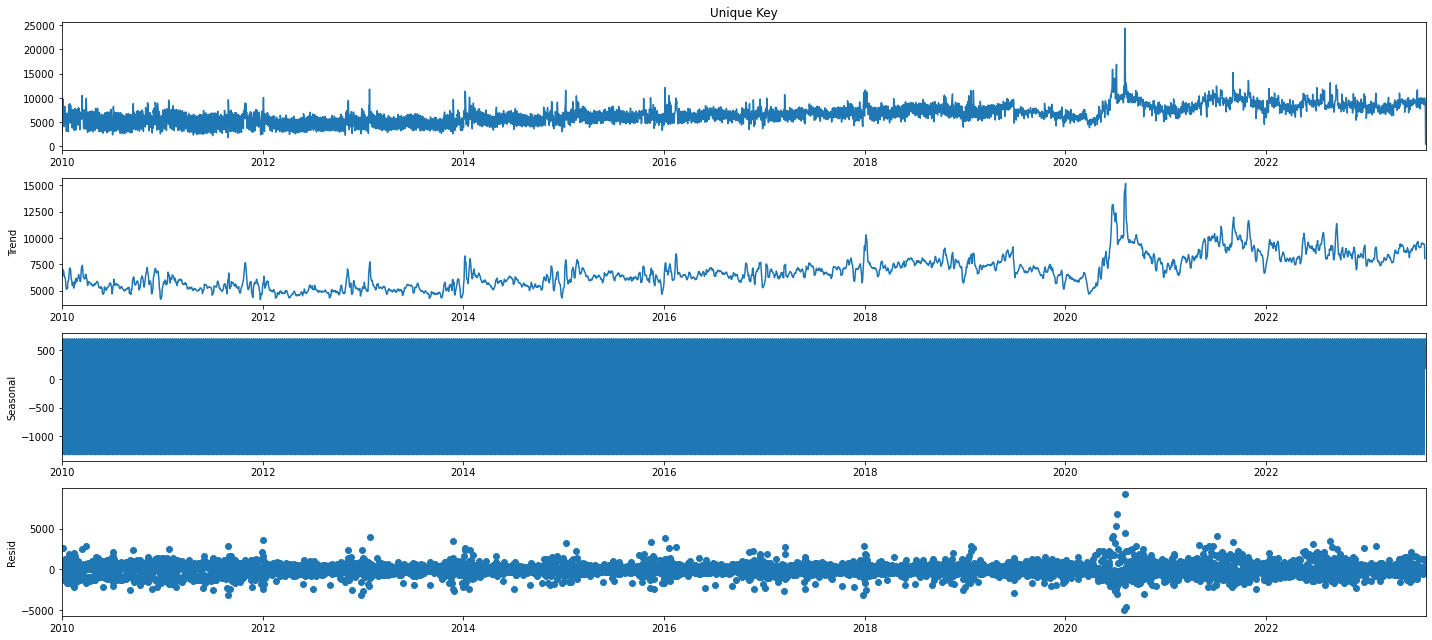

In [32]:
# We use the additive model

plt.rcParams['figure.figsize'] = (20, 9)
result.plot();

In [33]:
# Each of the above components are contained in our `result`
# object as trend, seasonal and error.
# Let us put them in a dataframe
ets = pd.DataFrame({'Unique Key': CALL_UK_D_S['Unique Key'], 
              'trend': result.trend, 
              'seasonality': result.seasonal, 
              'error': result.resid})
# ets.to_excel('ets_mul.xlsx')

ets[(ets.index < '2020-12-26 00:00:00') & (ets.index >= '2020-12-25 00:00:00')]

,Unique Key,trend,seasonality,error
Created Date,,,,
2020-12-25,5027,6411.428571,182.697638,-1567.126209


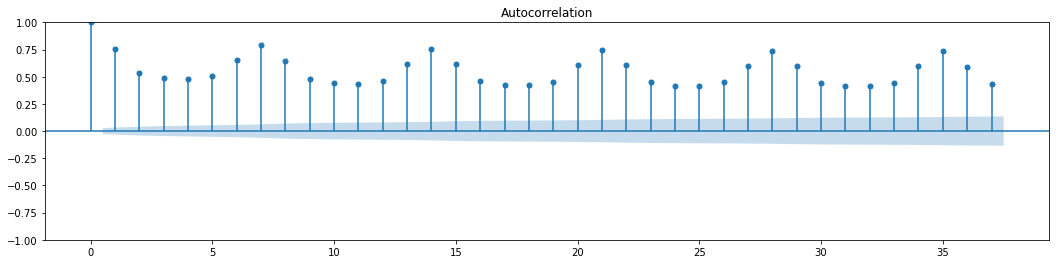

In [34]:
# Autocorrelation plots for frequency 
plt.rc("figure", figsize=(18,4))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(CALL_UK_D_S['Unique Key']);


In [35]:
# Get raw values for auto-correlations

from statsmodels.tsa.stattools import acf
acf(CALL_UK_D_S['Unique Key'])

array([1.        , 0.75051424, 0.5385677 , 0.48763193, 0.47912318,
       0.50367422, 0.65325166, 0.78735576, 0.64024251, 0.47810689,
       0.4412852 , 0.43245455, 0.45933263, 0.61601086, 0.75916101,
       0.61690178, 0.46145806, 0.4277244 , 0.42450554, 0.4555627 ,
       0.61056881, 0.74821479, 0.60717727, 0.4484158 , 0.41633872,
       0.41518982, 0.45040719, 0.59985602, 0.73376054, 0.59641813,
       0.44172261, 0.4143002 , 0.41500839, 0.44366085, 0.59565884,
       0.73652828, 0.59316864])

In [36]:
# Slightly nicer output making it easy to read lag and correlation
[(n,x ) for n, x in enumerate(acf(CALL_UK_D_S['Unique Key']))]

[(0, 1.0),
 (1, 0.7505142364756073),
 (2, 0.5385677005464163),
 (3, 0.4876319349471612),
 (4, 0.47912317586861014),
 (5, 0.5036742164042234),
 (6, 0.6532516645683314),
 (7, 0.7873557591053877),
 (8, 0.6402425082224174),
 (9, 0.4781068899314745),
 (10, 0.44128520422701517),
 (11, 0.43245454663032395),
 (12, 0.45933262752022097),
 (13, 0.6160108562208476),
 (14, 0.7591610121270015),
 (15, 0.6169017761087279),
 (16, 0.46145805728555667),
 (17, 0.4277243963001102),
 (18, 0.4245055433765635),
 (19, 0.45556269608625855),
 (20, 0.6105688068921138),
 (21, 0.7482147856274084),
 (22, 0.6071772694322987),
 (23, 0.44841580285332344),
 (24, 0.4163387168357927),
 (25, 0.4151898156499598),
 (26, 0.45040718958726733),
 (27, 0.5998560199396321),
 (28, 0.7337605423131681),
 (29, 0.5964181344488516),
 (30, 0.44172261087389936),
 (31, 0.41430019827396114),
 (32, 0.41500839499299474),
 (33, 0.443660849177503),
 (34, 0.5956588412234556),
 (35, 0.7365282791908934),
 (36, 0.5931686446827368)]

In [38]:
#FB Prophet
from prophet import Prophet

In [39]:
# Train-test split, test set is 90 days
train_samples = int(CALL_UK_D_S.shape[0])-90

train_set = CALL_UK_D_S.iloc[:train_samples]
test_set = CALL_UK_D_S.iloc[train_samples:]

print("Training set: ", train_set.shape[0])
print("Test set: ", test_set.shape[0])

Training set:  4874
Test set:  90


In [40]:
train_set.head()

,Unique Key
Created Date,
2010-01-01,2942
2010-01-02,3958
2010-01-03,5676
2010-01-04,9763
2010-01-05,8735


In [41]:
# Create the ds and y columns for Prophet
train_set_prophet = train_set.reset_index()
train_set_prophet = train_set_prophet[['Created Date', 'Unique Key']]
train_set_prophet.columns = ['ds', 'y']
train_set_prophet.head()

,ds,y
0,2010-01-01,2942
1,2010-01-02,3958
2,2010-01-03,5676
3,2010-01-04,9763
4,2010-01-05,8735


In [42]:
model = Prophet()
model.fit(train_set_prophet)

01:16:58 - cmdstanpy - INFO - Chain [1] start processing
01:17:00 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future = model.make_future_dataframe(periods=90,freq = 'd')
future.tail()

,ds
4959,2023-07-31
4960,2023-08-01
4961,2023-08-02
4962,2023-08-03
4963,2023-08-04


In [64]:
future.shape

(4964, 1)

In [65]:
# Python
forecast = model.predict(future)

In [66]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [67]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,5954.354615,4189.458387,6980.985153,5954.354615,5954.354615,-347.077044,-347.077044,-347.077044,183.228207,183.228207,183.228207,-530.305251,-530.305251,-530.305251,0.0,0.0,0.0,5607.277571
1,2010-01-02,5953.248169,2938.756450,5710.437762,5953.248169,5953.248169,-1588.817907,-1588.817907,-1588.817907,-1101.541144,-1101.541144,-1101.541144,-487.276763,-487.276763,-487.276763,0.0,0.0,0.0,4364.430262
2,2010-01-03,5952.141723,2741.250849,5619.174951,5952.141723,5952.141723,-1775.941788,-1775.941788,-1775.941788,-1337.426506,-1337.426506,-1337.426506,-438.515282,-438.515282,-438.515282,0.0,0.0,0.0,4176.199935
3,2010-01-04,5951.035277,4798.780593,7526.626818,5951.035277,5951.035277,256.011991,256.011991,256.011991,640.813618,640.813618,640.813618,-384.801627,-384.801627,-384.801627,0.0,0.0,0.0,6207.047269
4,2010-01-05,5949.928831,4955.267927,7688.825517,5949.928831,5949.928831,369.648701,369.648701,369.648701,696.666654,696.666654,696.666654,-327.017954,-327.017954,-327.017954,0.0,0.0,0.0,6319.577532


In [68]:
preds = pd.DataFrame({'Prediction': forecast.yhat[-90:]})
preds.index = pd.to_datetime(forecast.ds[-90:])
preds.index.names = ['Date']
preds

,Prediction
Date,
2023-05-07,7219.547517
2023-05-08,9206.425113
2023-05-09,9267.871065
2023-05-10,9107.774151
2023-05-11,8958.311578
...,...
2023-07-31,9552.056178
2023-08-01,9599.849004
2023-08-02,9426.091683


In [69]:
# Calculate Evaluation Metrics

y_test = test_set['Unique Key'] 
y_pred = preds['Prediction']
pd.DataFrame({'y_test': y_test, 'y_pred' : y_pred, 'diff':y_test - y_pred})

,y_test,y_pred,diff
2023-05-07,9102,7219.547517,1882.452483
2023-05-08,9709,9206.425113,502.574887
2023-05-09,9309,9267.871065,41.128935
2023-05-10,9110,9107.774151,2.225849
2023-05-11,9155,8958.311578,196.688422
...,...,...,...
2023-07-31,9921,9552.056178,368.943822
2023-08-01,9813,9599.849004,213.150996
2023-08-02,9245,9426.091683,-181.091683
2023-08-03,9128,9262.739148,-134.739148


In [70]:
# Model evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  1522092.7511081337
RMSE =  1233.7312313093698
MAE =  698.1105306105491


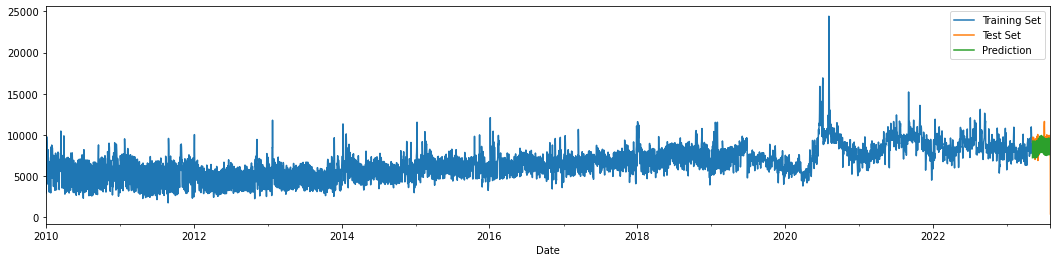

In [72]:
# Plot results

train_set['Unique Key'].rename('Training Set').plot(legend=True)
test_set['Unique Key'].rename('Test Set').plot(legend=True)
preds.Prediction.plot(legend = True)
plt.show()